In [166]:
#Importing the dataset 
from vega_datasets import data
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
df= data.sf_temps()

In [85]:
df['day_of_week']= df['date'].dt.day_name()
df= df.set_index('date')

In [44]:
df.day_of_week

date
2010-01-01 00:00:00    Friday
2010-01-01 01:00:00    Friday
2010-01-01 02:00:00    Friday
2010-01-01 03:00:00    Friday
2010-01-01 04:00:00    Friday
                        ...  
2010-12-31 19:00:00    Friday
2010-12-31 20:00:00    Friday
2010-12-31 21:00:00    Friday
2010-12-31 22:00:00    Friday
2010-12-31 23:00:00    Friday
Name: day_of_week, Length: 8759, dtype: object

In [61]:
df.resample('D').mean()

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667
...,...
2010-12-27,48.991667
2010-12-28,49.000000
2010-12-29,49.012500


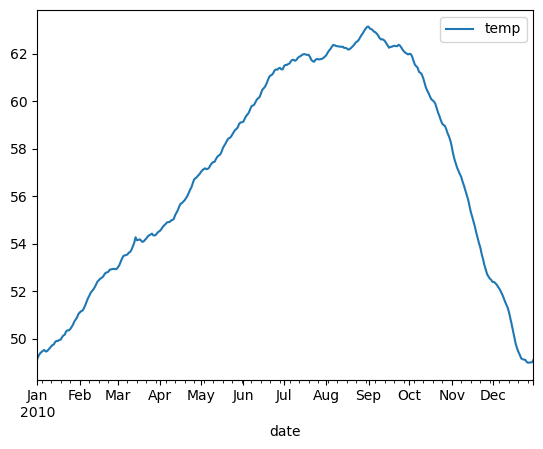

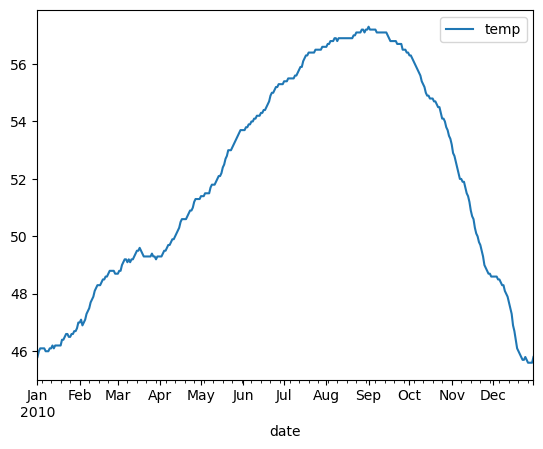

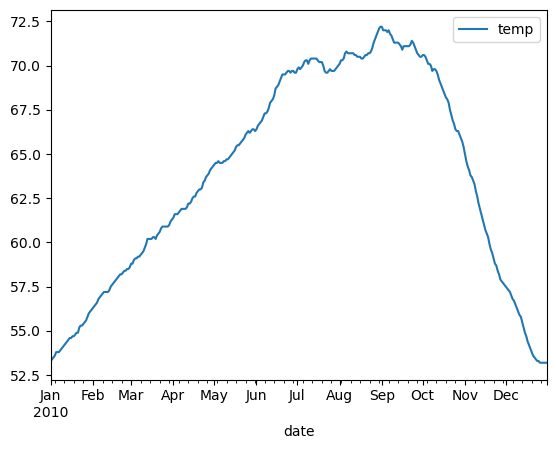

In [24]:
# Average sample by day 
df.resample('D').mean().plot()
df.resample('D').min().plot()
df.resample('D').max().plot()
plt.show()

**What month is the coldest month on average?**
- The coldest month on average is December

**Which month has the highest average temperature?**
- The hottest month on average is September

In [86]:
df.resample('D').agg(['min', 'max'])

temp       day_of_week           
             min   max         min        max
date                                         
2010-01-01  45.8  53.3      Friday     Friday
2010-01-02  46.0  53.4    Saturday   Saturday
2010-01-03  46.1  53.5      Sunday     Sunday
2010-01-04  46.1  53.6      Monday     Monday
2010-01-05  46.1  53.8     Tuesday    Tuesday
...          ...   ...         ...        ...
2010-12-27  45.6  53.2      Monday     Monday
2010-12-28  45.6  53.2     Tuesday    Tuesday
2010-12-29  45.6  53.2   Wednesday  Wednesday
2010-12-30  45.6  53.2    Thursday   Thursday
2010-12-31  45.8  53.2      Friday     Friday

[365 rows x 4 columns]

<AxesSubplot: xlabel='date'>

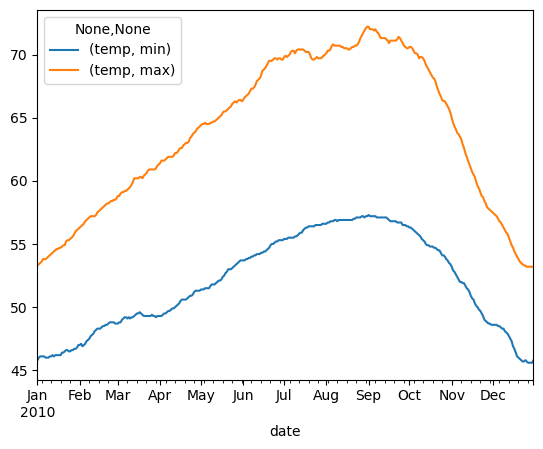

In [89]:
df.resample('D').agg(['min','max']).plot()

**Which month has the highest daily temperature variability?**
- The biggest variance is September

/var/folders/6g/l26q8gx91f157w7v1zccg2wm0000gq/T/ipykernel_18626/3480445743.py:1: FutureWarning: ['day_of_week'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.resample('D').agg(['mean','min','max']).plot()


<AxesSubplot: xlabel='date'>

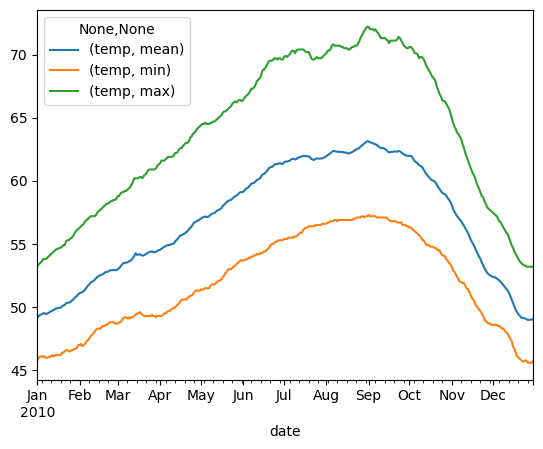

In [90]:
df.resample('D').agg(['mean','min','max']).plot()

**Visualize the daily min, average, and max temperature over time on a single line plot**

##### Weather in Seattle

In [143]:
weather = data.seattle_weather()

In [144]:
weather.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [145]:
weather['day_of_week']= weather['date'].dt.day_name()
weather['month']= weather['date'].dt.month

In [146]:
weather= weather.set_index('date')

In [147]:
rain_df= weather.drop(columns=['weather', 'wind', 'temp_max', 'temp_min', 'month'])

<AxesSubplot: xlabel='date'>

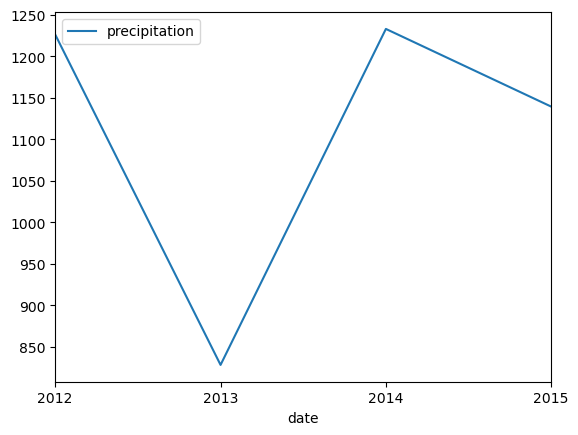

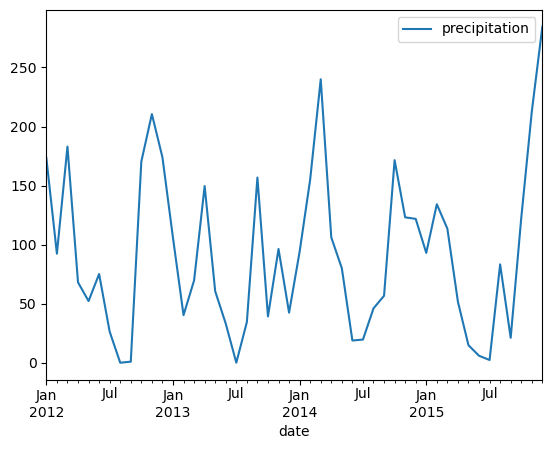

In [148]:
rain_df.resample('Y').sum().plot()
rain_df.resample('M').sum().plot()

<AxesSubplot: xlabel='date'>

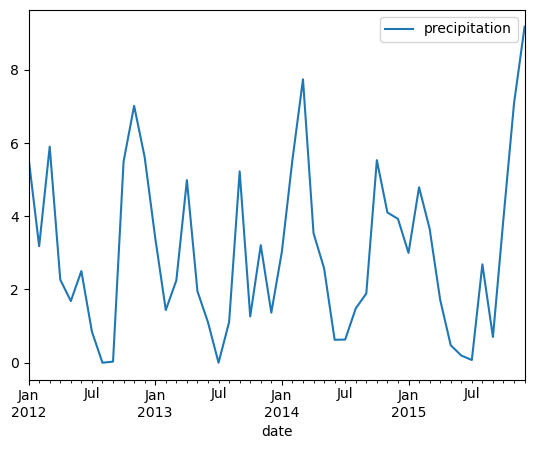

In [150]:
rain_df.resample('M').mean().plot()

In [154]:
wind_df=weather.drop(columns=['precipitation', 'temp_max', 'temp_min', 'weather', 'day_of_week', 'month'])

In [167]:
wind_df.head()

,wind
date,
2012-01-01,4.7
2012-01-02,4.5
2012-01-03,2.3
2012-01-04,4.7
2012-01-05,6.1


<AxesSubplot: xlabel='date'>

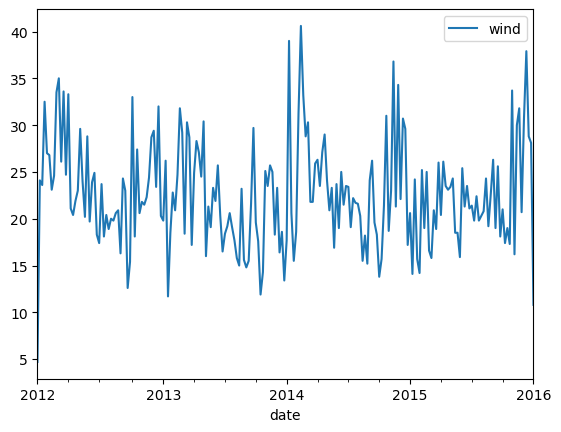

In [180]:
wind_df.resample('W').sum().plot()

######  Amount of wind over time

<AxesSubplot: xlabel='date'>

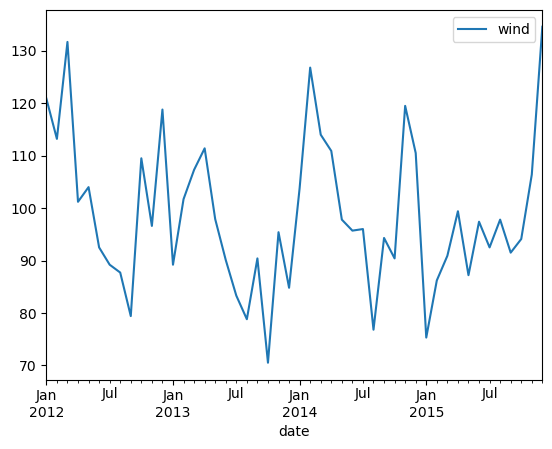

In [170]:
wind_df.resample('M').sum().plot()


**The windiest year-month combination is DEC 2015**

In [173]:
weather_new_df = weather.drop(columns=['month', 'day_of_week', 'wind', 'temp_min', 'temp_max', 'precipitation'])

In [182]:
weather_new_df['sunny_day'] = weather_new_df.weather=='sun'

In [185]:
weather_new_df.sunny_day.resample('Y').sum().sort_values(ascending=False).head(1)

date
2014-12-31    211
Name: sunny_day, dtype: int64

In [188]:
weather_new_df['rainy_day'] = weather_new_df.weather == 'rain'

In [ ]:
weather

#### Flight 20K

In [92]:
plane = data.flights_20k()

In [96]:
plane.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND
